In [1]:
import pandas as pd
import plotly.express as px
import itertools

In [2]:
!pip install dash

In [2]:
import dash
import dash_html_components as html
from dash import dcc, ctx
from dash.dependencies import Input, Output
import matplotlib.pyplot as plt

C:\Users\Ramon\AppData\Local\Temp\ipykernel_2616\3336933188.py:2: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [3]:
################################ DATASET DE FETS CONEGUTS ###################################

In [3]:
df = pd.read_csv('https://analisi.transparenciacatalunya.cat/api/views/qnyt-emjc/rows.csv?accessType=DOWNLOAD&sorting=true')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251676 entries, 0 to 251675
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Mes                         251676 non-null  int64 
 1   Nom mes                     251676 non-null  object
 2   Any                         251676 non-null  int64 
 3   Regió Policial (RP)         251676 non-null  object
 4   Àrea Bàsica Policial (ABP)  251676 non-null  object
 5   Títol Codi Penal            251220 non-null  object
 6   Tipus de fet                251220 non-null  object
 7   Coneguts                    251676 non-null  int64 
 8   Resolts                     251676 non-null  int64 
 9   Detencions                  251676 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 19.2+ MB


In [4]:
#Contem quants valors nuls tenim a cada columna
print("Mes (NA):"+str(df['Mes'].isna().sum()))
print("Nom mes (NA):"+str(df['Nom mes'].isna().sum()))
print("Any (NA):"+str(df['Any'].isna().sum()))
print("Regió Policial (RP) (NA):"+str(df['Regió Policial (RP)'].isna().sum()))
print("Àrea Bàsica Policial (ABP) (NA):"+str(df['Àrea Bàsica Policial (ABP)'].isna().sum()))
print("Títol Codi Penal (NA):"+str(df['Títol Codi Penal'].isna().sum()))
print("Tipus de fet (NA):"+str(df['Tipus de fet'].isna().sum()))
print("Coneguts (NA):"+str(df['Coneguts'].isna().sum()))
print("Resolts (NA):"+str(df['Resolts'].isna().sum()))
print("Detencions (NA):"+str(df['Detencions'].isna().sum()))

Mes (NA):0
Nom mes (NA):0
Any (NA):0
Regió Policial (RP) (NA):0
Àrea Bàsica Policial (ABP) (NA):0
Títol Codi Penal (NA):456
Tipus de fet (NA):456
Coneguts (NA):0
Resolts (NA):0
Detencions (NA):0


In [5]:
#Com que els valors nuls representen un petit percentatge de les files podem eliminar aquestes files directament
df = df.dropna()
df_fetsConeguts = df.copy()

<AxesSubplot:ylabel='Mes'>

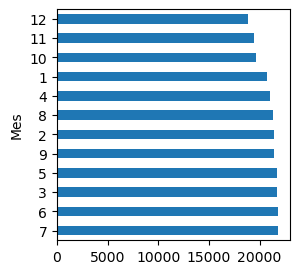

In [6]:
df['Mes'].value_counts(dropna=False).plot(kind='barh', xlabel="Mes", figsize=(3,3))

<AxesSubplot:ylabel='Nom mes'>

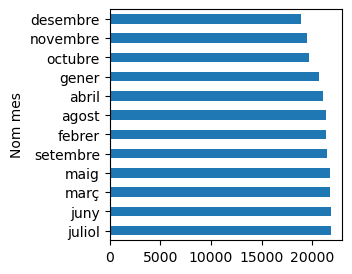

In [7]:
df['Nom mes'].value_counts(dropna=False).plot(kind='barh', xlabel="Nom mes", figsize=(3,3))

Compte, el que es podem osbervar a aquestes dues gràfiques anteriors no és pas el nombre de delictes, sinó el nombre de registres del Dataset. Però cada registre pot representar múltiples denúncies.

<AxesSubplot:ylabel='Any'>

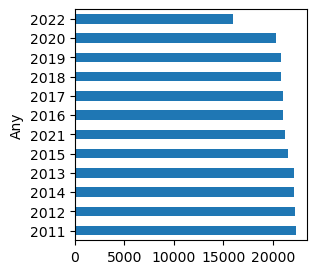

In [8]:
df['Any'].value_counts(dropna=False).plot(kind='barh', xlabel="Any", figsize=(3,3))

Al 2022 hi ha menys registres perquè al Dataset no hi consten totes les dades del 2022 (només de Gener a Setembre).

<AxesSubplot:ylabel='Regió Policial (RP)'>

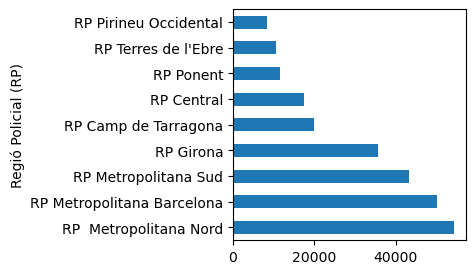

In [9]:
df['Regió Policial (RP)'].value_counts(dropna=False).plot(kind='barh', xlabel="Regió Policial (RP)", figsize=(3,3))

Podem observar que la gran majoria de les denúncies es fan a l'àrea metropolitana de Barcelona.

<AxesSubplot:ylabel='Àrea Bàsica Policial (ABP)'>

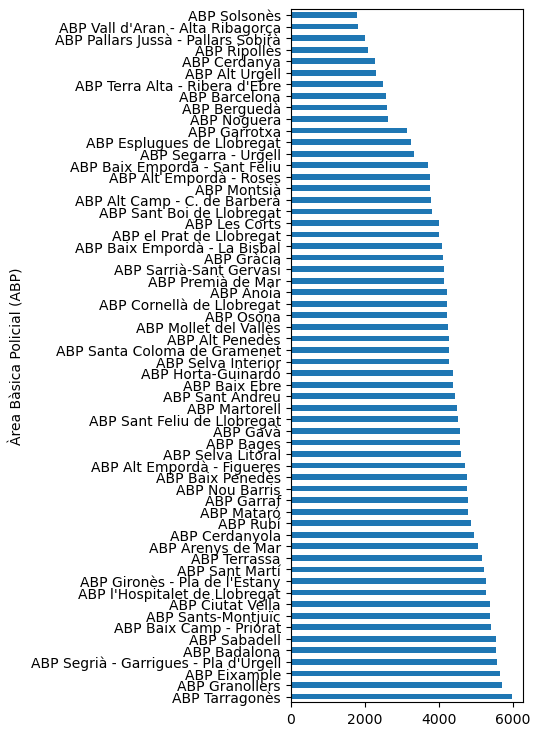

In [10]:
df['Àrea Bàsica Policial (ABP)'].value_counts(dropna=False).plot(kind='barh', xlabel="Àrea Bàsica Policial (ABP)", figsize=(3,9))

A nivell d'àrees bàsiques policials, on més denúncies hi ha són àrees de l'àrea metropolitana de Barcelona però també en alguns punts com el Tarragonès, Gironès...

<AxesSubplot:ylabel='Títol Codi Penal'>

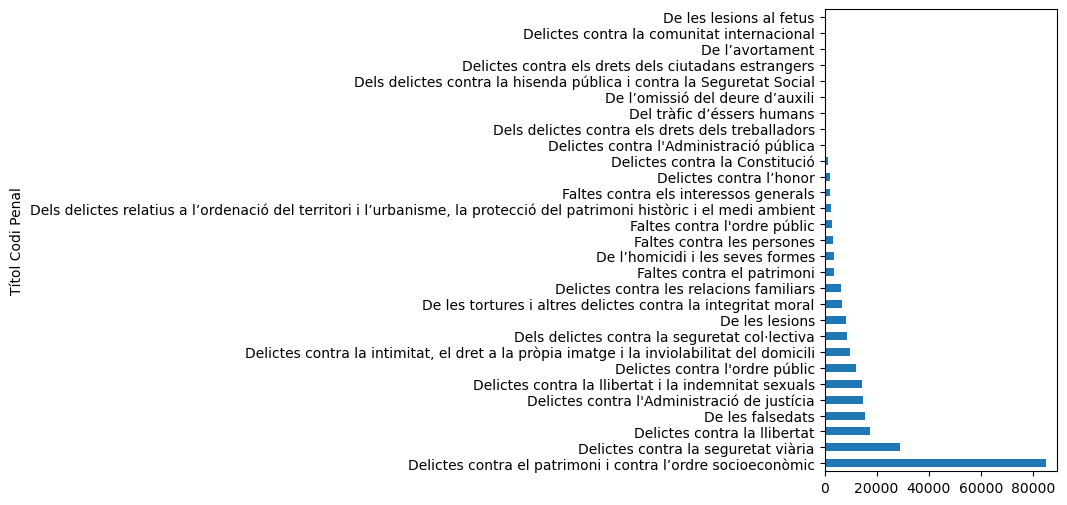

In [11]:
df['Títol Codi Penal'].value_counts(dropna=False).plot(kind='barh', xlabel="Títol Codi Penal", figsize=(3,6))

<AxesSubplot:ylabel='Tipus de fet'>

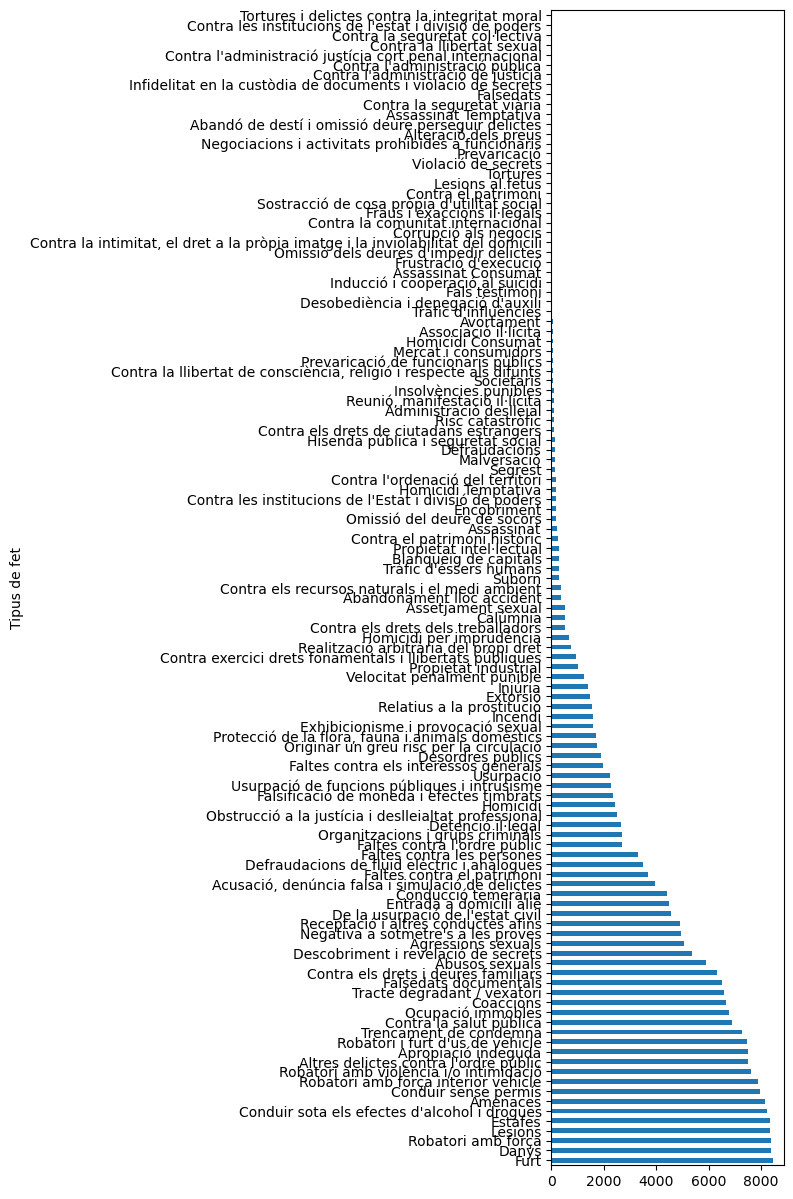

In [12]:
df['Tipus de fet'].value_counts(dropna=False).plot(kind='barh', xlabel="Tipus de fet", figsize=(3,15))

Observem que la majoria de registres estàn relacionats principalment amb els furts/robatoris, violència, seguretat viària... mentre que molts altres registres representen delictes aïllats.

In [13]:
### Pregunta 1 - Quina és l'evolució de la delinqüència en els últims anys?###

In [14]:
#Ens aniria bé crear una nova columna que es digués Any_mes, la qual serà una composició/concatenació de l'any i el mes
df['Any_mes'] = df['Any'].astype(str)+"-"+df['Mes'].astype(str)

In [15]:
fig_evolucio = px.line(df, x="Any_mes", y="Coneguts", color="Any")

In [16]:
### Pregunta 2 - Quins tipus de delicte estàn incrementant/disminuint?###

In [17]:
df_tmp = df.groupby(by="Títol Codi Penal").sum()
df_tmp = df_tmp.sort_values('Coneguts', ascending=False)
llista = df_tmp["Coneguts"][0:5].keys().tolist()

In [18]:
df2 = df.loc[df['Títol Codi Penal'] == llista[0]].groupby(by="Any").sum()
llistaConeguts_0 = list(df2["Coneguts"])

In [19]:
df2 = df.loc[df['Títol Codi Penal'] == llista[1]].groupby(by="Any").sum()
llistaConeguts_1 = list(df2["Coneguts"])

In [20]:
df2 = df.loc[df['Títol Codi Penal'] == llista[2]].groupby(by="Any").sum()
llistaConeguts_2 = list(df2["Coneguts"])

In [21]:
df2 = df.loc[df['Títol Codi Penal'] == llista[3]].groupby(by="Any").sum()
llistaConeguts_3 = list(df2["Coneguts"])

In [22]:
df2 = df.loc[df['Títol Codi Penal'] == llista[4]].groupby(by="Any").sum()
llistaConeguts_4 = list(df2["Coneguts"])

In [23]:
llista

['Delictes contra el patrimoni i contra l’ordre socioeconòmic',
 'Faltes contra el patrimoni',
 'De les lesions',
 'Delictes contra la seguretat viària',
 'Delictes contra la llibertat']

In [24]:
llistaAnys = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

In [25]:
llisConeguts = zip(llistaConeguts_0,llistaConeguts_1,llistaConeguts_2,llistaConeguts_3,llistaConeguts_4)
llisConeguts = list(itertools.chain.from_iterable(llisConeguts))

In [26]:
llisX12 = []
for i in range(12):
    llisX12.append(llista)
llisX12 = list(itertools.chain.from_iterable(llisX12))

In [27]:
d = {'Any':[item for item in llistaAnys for i in range(5)],'Coneguts':llisConeguts,'Títol Codi Penal':llisX12}

In [28]:
df2 = pd.DataFrame(d, columns=['Any', 'Coneguts', 'Títol Codi Penal'], dtype="string")

In [29]:
df2["Any"] = df2["Any"].astype('int')
df2["Coneguts"] = df2["Coneguts"].astype('int')

In [30]:
fig_delIncr = px.line(df2, x="Any", y="Coneguts", color="Títol Codi Penal")

In [31]:
###Pregunta 3 - En quines zones de Catalunya hi ha més delinqüència? I en quines hi ha més increment de la delinqüència?###

In [32]:
llistaRegions = ["RP Metropolitana Nord	", "RP Camp de Tarragona", "RP Central", "RP Girona", "RP Metropolitana Barcelona", "RP Metropolitana Sud", "RP Pirineu Occidental", "RP Ponent", "RP Terres de l'Ebre"]

In [33]:
llisX12 = []
for i in range(12):
    llisX12.append(llistaRegions)
llisX12 = list(itertools.chain.from_iterable(llisX12))

In [34]:
t = df.sort_values(["Regió Policial (RP)"],ascending=False).groupby(["Any","Regió Policial (RP)"]).sum()
t = {'Any':[item for item in llistaAnys for i in range(9)],'Coneguts':t['Coneguts'],'Regió Policial (RP)':llisX12}
fig_zonesDel = px.bar(t, x='Any', y='Coneguts', color="Regió Policial (RP)")

In [35]:
###Pregunta 4 - Hi ha èpoques de l'any en les que hi ha més o menys delinqüència? Varien els tipus de delictes comesos segons l'època de l'any? En quins tipus de delicte s'ha aconseguit detenir a l'autor en major percentatge de casos i en quin menys?###

In [36]:
llistaMesos = ["Gener", "Febrer", "Març", "Abril", "Maig", "Juny", "Juliol", "Agost", "Setembre", "Octubre", "Novembre", "Desembre"]

In [37]:
t = df.groupby(["Mes"]).sum()
t = {'Mes':llistaMesos,'Coneguts':t['Coneguts'], 'Resolts':t['Resolts'], 'Detencions':t['Detencions']}
fig_perMesos = px.line(t, x='Mes', y=['Coneguts', 'Resolts', 'Detencions'])

In [38]:
################################# DATASET DELICTES ODI I DISCRIMINACIÓ ######################################

In [39]:
df = pd.read_csv('https://analisi.transparenciacatalunya.cat/api/views/gci6-2ubm/rows.csv?accessType=DOWNLOAD&sorting=true')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Any                                                     1969 non-null   int64  
 1   Núm. Mes                                                1969 non-null   int64  
 2   Nom Mes                                                 1969 non-null   object 
 3   Regió Policial (RP)                                     1969 non-null   object 
 4   Àrea Bàsica Policial (ABP)                              1969 non-null   object 
 5   Província                                               1969 non-null   object 
 6   Comarca                                                 1969 non-null   object 
 7   Municipi                                                1969 non-null   object 
 8   Tipus de lloc dels fets               

In [40]:
#Contem quants valors nuls tenim a cada columna
print("Any (NA):"+str(df['Any'].isna().sum()))
print("Num mes (NA):"+str(df['Núm. Mes'].isna().sum()))
print("Nom Mes (NA):"+str(df['Nom Mes'].isna().sum()))
print("Regió Policial (RP) (NA):"+str(df['Regió Policial (RP)'].isna().sum()))
print("Àrea Bàsica Policial (ABP) (NA):"+str(df['Àrea Bàsica Policial (ABP)'].isna().sum()))
print("Província (NA):"+str(df['Província'].isna().sum()))
print("Comarca (NA):"+str(df['Comarca'].isna().sum()))
print("Municipi (NA):"+str(df['Municipi'].isna().sum()))
print("Tipus de lloc dels fets (NA):"+str(df['Tipus de lloc dels fets'].isna().sum()))
print("Tipus de fet (NA):"+str(df['Tipus de fet'].isna().sum()))
print("Tipus de fet (Codi penal) o d’Infracció (altres lleis) (NA):"+str(df['Tipus de fet (Codi penal) o d’Infracció (altres lleis)'].isna().sum()))
print("Àmbit fet (NA):"+str(df['Àmbit fet'].isna().sum()))
print("Rol (NA):"+str(df['Rol'].isna().sum()))
print("Sexe (NA):"+str(df['Sexe'].isna().sum()))
print("Edat (NA):"+str(df['Edat'].isna().sum()))
print("Nombre víctimes (NA):"+str(df['Nombre víctimes'].isna().sum()))

Any (NA):0
Num mes (NA):0
Nom Mes (NA):0
Regió Policial (RP) (NA):0
Àrea Bàsica Policial (ABP) (NA):0
Província (NA):0
Comarca (NA):0
Municipi (NA):0
Tipus de lloc dels fets (NA):0
Tipus de fet (NA):0
Tipus de fet (Codi penal) o d’Infracció (altres lleis) (NA):0
Àmbit fet (NA):0
Rol (NA):0
Sexe (NA):0
Edat (NA):0
Nombre víctimes (NA):1


In [41]:
#Com que només hi ha un valor nul podem eliminar aquella fila
df = df.dropna()

<AxesSubplot:ylabel='Any'>

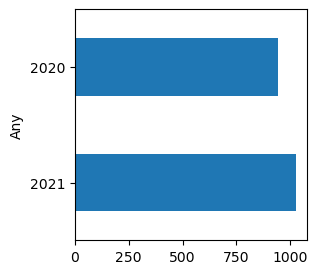

In [42]:
df['Any'].value_counts(dropna=False).plot(kind='barh', xlabel="Any", figsize=(3,3))

Observem que són fets dels anys 2020 i 2021

<AxesSubplot:ylabel='Núm. Mes'>

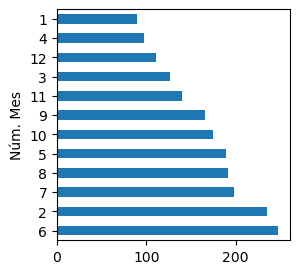

In [43]:
df['Núm. Mes'].value_counts(dropna=False).plot(kind='barh', xlabel="Núm. Mes", figsize=(3,3))

<AxesSubplot:ylabel='Nom Mes'>

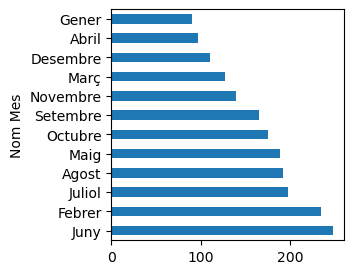

In [44]:
df['Nom Mes'].value_counts(dropna=False).plot(kind='barh', xlabel="Nom Mes", figsize=(3,3))

Com ja haviem observat en el dataset anterior, a l'estiu hi solen haver més casos que a l'hivern

<AxesSubplot:ylabel='Regió Policial (RP)'>

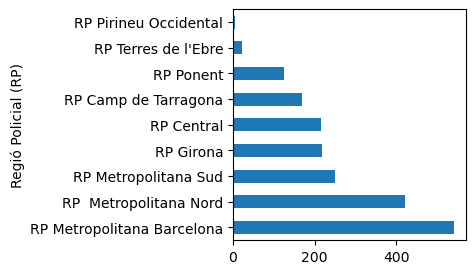

In [45]:
df['Regió Policial (RP)'].value_counts(dropna=False).plot(kind='barh', xlabel="Regió Policial (RP)", figsize=(3,3))

Igual que en el dataset anterior veiem que a l'àrea metropolitana és on hi trobem més casos

<AxesSubplot:ylabel='Àrea Bàsica Policial (ABP)'>

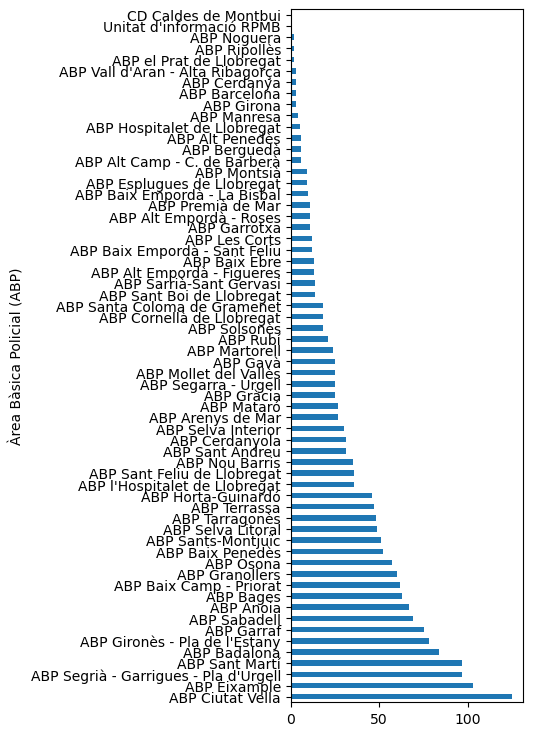

In [46]:
df['Àrea Bàsica Policial (ABP)'].value_counts(dropna=False).plot(kind='barh', xlabel="Àrea Bàsica Policial (ABP)", figsize=(3,9))

<AxesSubplot:ylabel='Província'>

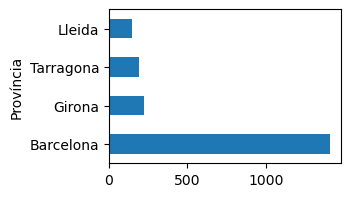

In [47]:
df['Província'].value_counts(dropna=False).plot(kind='barh', xlabel="Província", figsize=(3,2))

<AxesSubplot:ylabel='Comarca'>

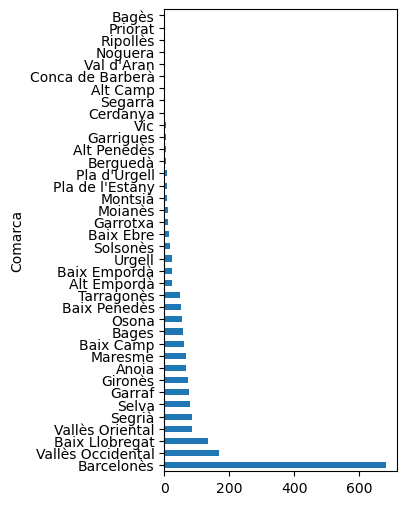

In [48]:
df['Comarca'].value_counts(dropna=False).plot(kind='barh', xlabel="Comarca", figsize=(3,6))

<AxesSubplot:ylabel='Municipi'>

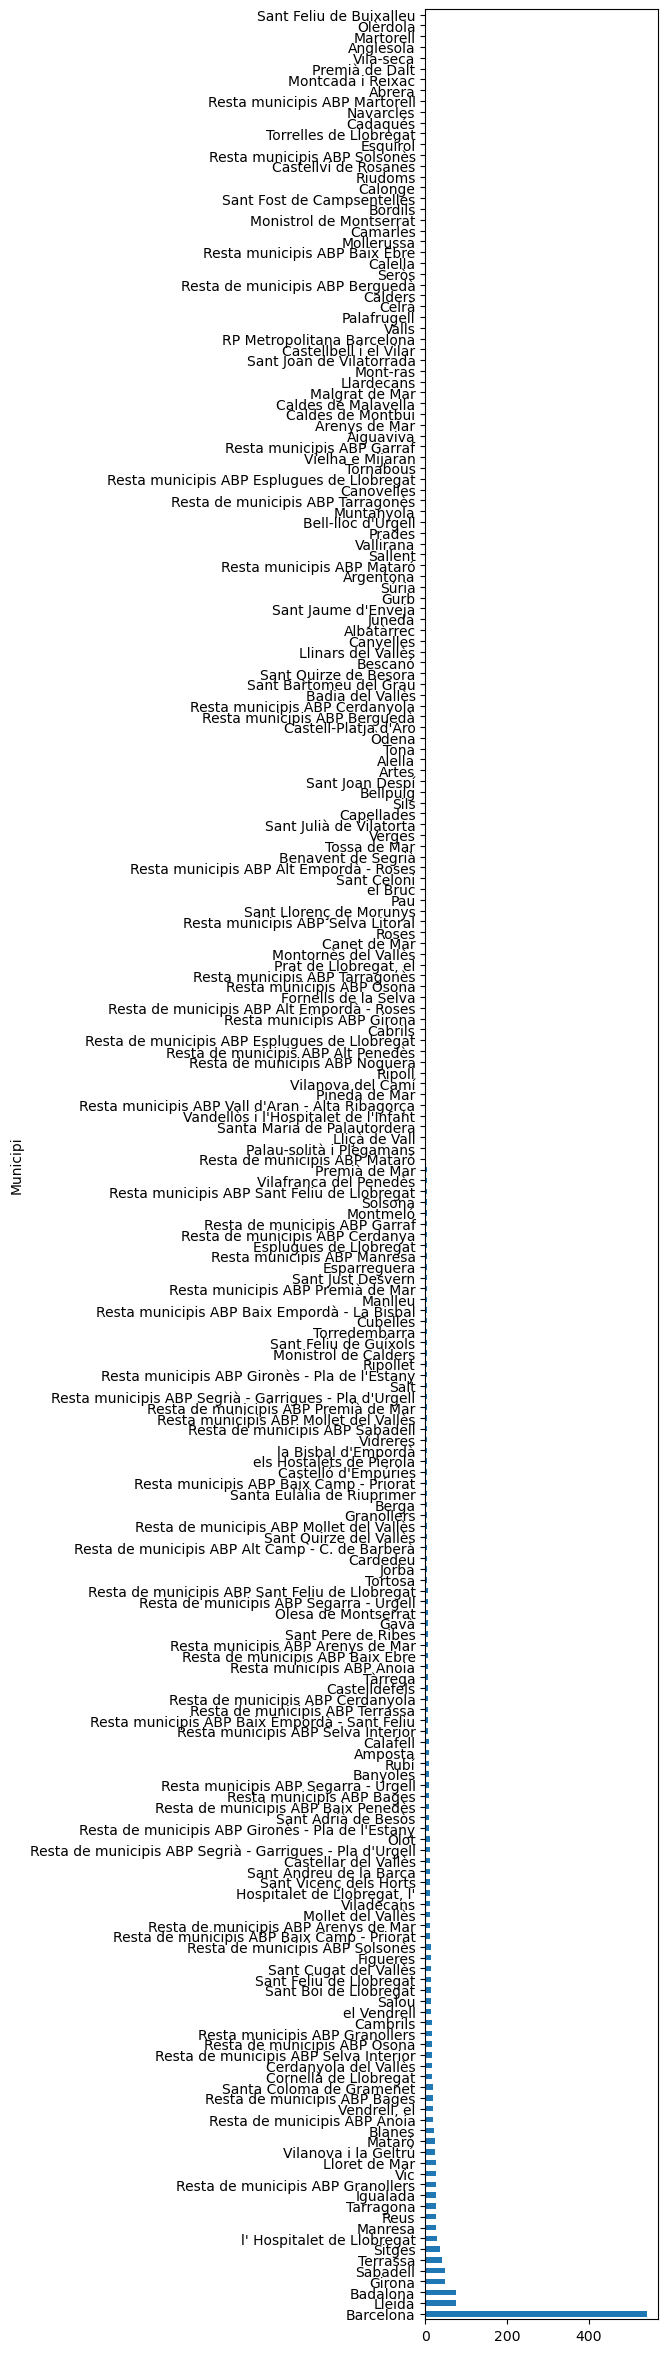

In [49]:
df['Municipi'].value_counts(dropna=False).plot(kind='barh', xlabel="Municipi", figsize=(3,30))

<AxesSubplot:ylabel='Tipus de lloc dels fets'>

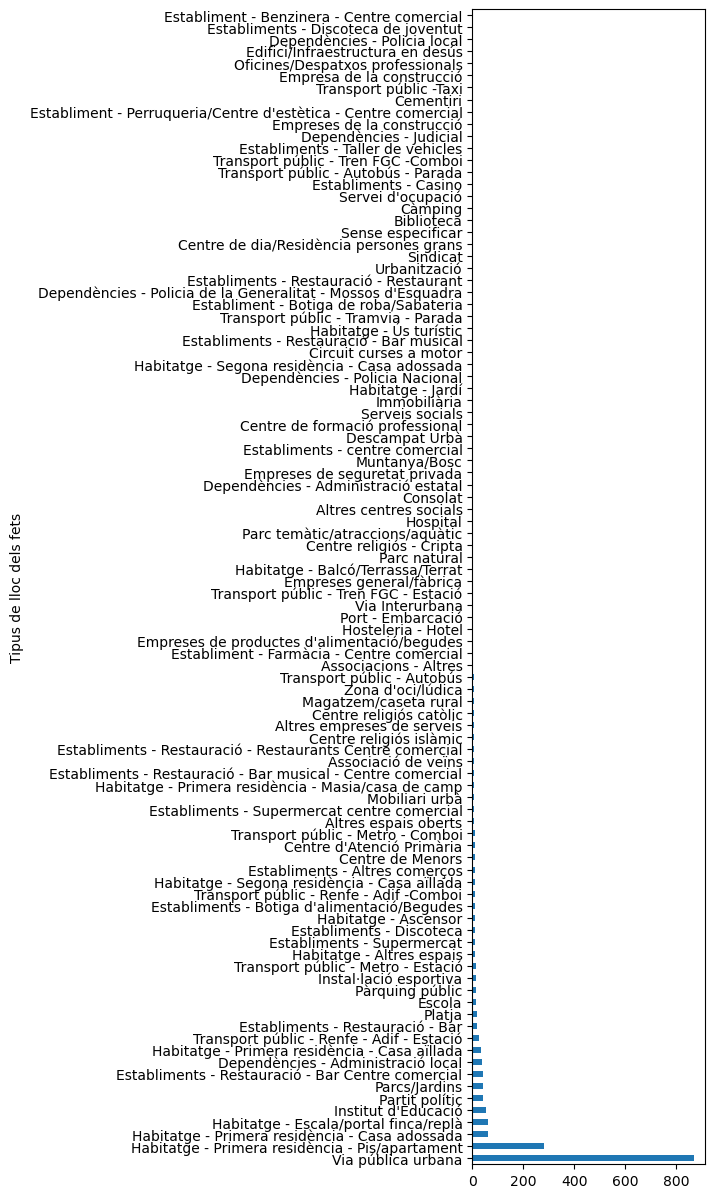

In [50]:
df['Tipus de lloc dels fets'].value_counts(dropna=False).plot(kind='barh', xlabel="Tipus de lloc dels fets", figsize=(3,15))

<AxesSubplot:ylabel='Tipus de fet'>

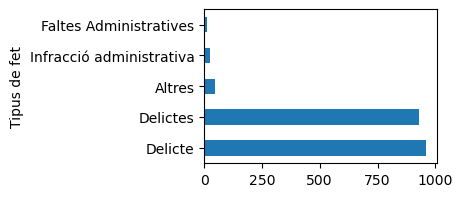

In [51]:
df['Tipus de fet'].value_counts(dropna=False).plot(kind='barh', xlabel="Tipus de fet", figsize=(3,2))

<AxesSubplot:ylabel='Tipus de fet (Codi penal) o d’Infracció (altres lleis)'>

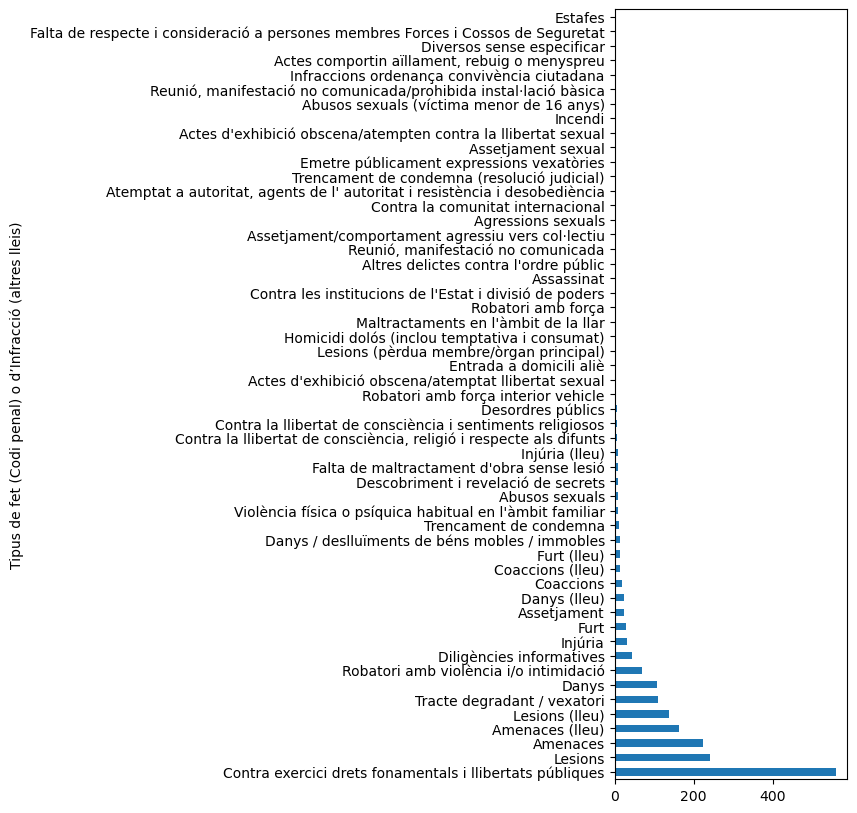

In [52]:
df['Tipus de fet (Codi penal) o d’Infracció (altres lleis)'].value_counts(dropna=False).plot(kind='barh', xlabel="Tipus de fet (Codi penal) o d’Infracció (altres lleis)", figsize=(3,10))

<AxesSubplot:ylabel='Àmbit fet'>

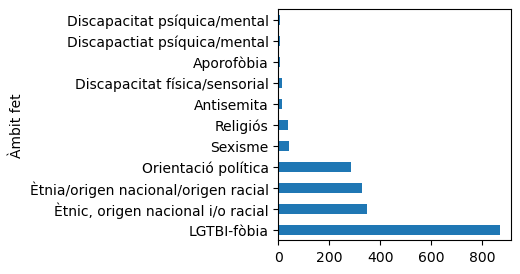

In [229]:
df['Àmbit fet'].value_counts(dropna=False).plot(kind='barh', xlabel="Àmbit fet", figsize=(3,3))

Observem que el col·lectiu LGTBI és el que més pateix discriminació

<AxesSubplot:ylabel='Rol'>

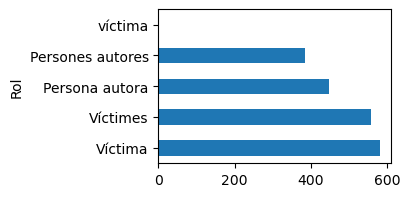

In [230]:
df['Rol'].value_counts(dropna=False).plot(kind='barh', xlabel="Rol", figsize=(3,2))

Haurem d'arreglar aquesta columna

In [53]:
df['Rol'] = df['Rol'].replace("víctima", "Víctima")
df_victimesDiscriminacio = df.copy()

<AxesSubplot:ylabel='Rol'>

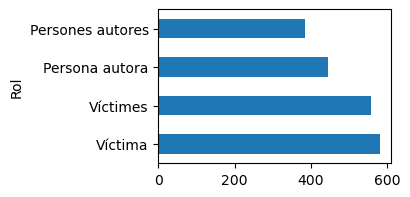

In [232]:
df['Rol'].value_counts(dropna=False).plot(kind='barh', xlabel="Rol", figsize=(3,2))

<AxesSubplot:ylabel='Sexe'>

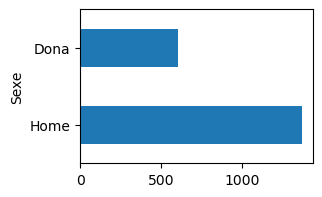

In [233]:
df['Sexe'].value_counts(dropna=False).plot(kind='barh', xlabel="Sexe", figsize=(3,2))

<AxesSubplot:ylabel='Edat'>

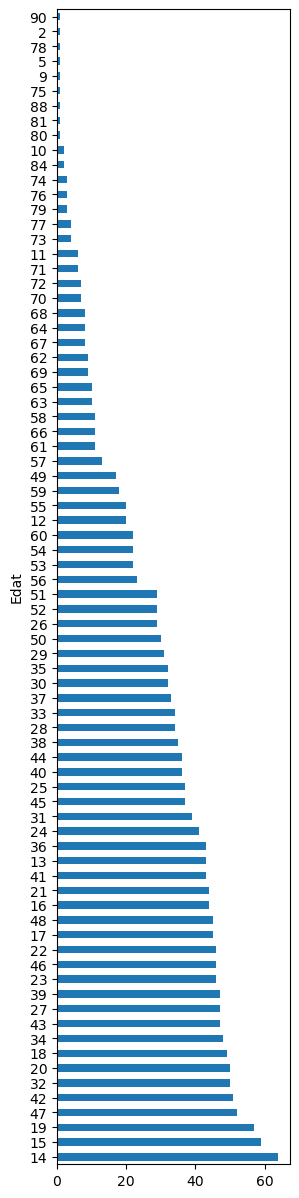

In [234]:
df['Edat'].value_counts(dropna=False).plot(kind='barh', xlabel="Edat", figsize=(3,15))

<AxesSubplot:ylabel='Nombre víctimes'>

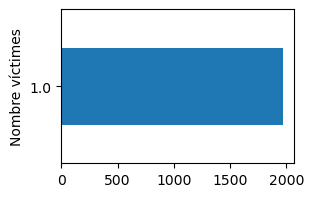

In [235]:
df['Nombre víctimes'].value_counts(dropna=False).plot(kind='barh', xlabel="Nombre víctimes", figsize=(3,2))

Veiem que sempre hi ha una sola víctima en cada registre

In [236]:
#Quina importància té l'edat envers la probabilitat de ser autor o víctima d'un delicte d'odi o discriminació?

In [65]:
llistaEdats = []
t = df_victimesDiscriminacio[(df_victimesDiscriminacio['Rol'] == 'Víctimes') & (df_victimesDiscriminacio['Àmbit fet'] == 'Sexisme')]
val = t['Edat']/t.count()[0]
llistaEdats.append(val)

t = df_victimesDiscriminacio[(df_victimesDiscriminacio['Rol'] == 'Víctima') & (df_victimesDiscriminacio['Àmbit fet'] == 'Sexisme')]
val = t['Edat']/t.count()[0]
llistaEdats.append(val)

t = df_victimesDiscriminacio[(df_victimesDiscriminacio['Rol'] == 'Persones autores') & (df_victimesDiscriminacio['Àmbit fet'] == 'Sexisme')]
val = t['Edat']/t.count()[0]
llistaEdats.append(val)

t = df_victimesDiscriminacio[(df_victimesDiscriminacio['Rol'] == 'Persona autora') & (df_victimesDiscriminacio['Àmbit fet'] == 'Sexisme')]
val = t['Edat']/t.count()[0]
llistaEdats.append(val)

llistaEdats = list(itertools.chain.from_iterable(llistaEdats))
t = df_victimesDiscriminacio[(df_victimesDiscriminacio['Àmbit fet'] == 'Sexisme')]
t = t.sort_values(["Rol"],ascending=False)
t['EdatMitja'] = llistaEdats
fig_edatDiscriminacio = px.pie(t, values='EdatMitja', names='Rol', title='Edat mitja dels autors i les víctimes')

In [55]:
#################################### DATASET denúncies per internet #################################################

In [56]:
###En el cas de les denúncies online, quin tipus de delicte és més probable que sigui o no sigui ratificat?###

In [57]:
df = pd.read_csv('https://analisi.transparenciacatalunya.cat/api/views/tuxj-za9s/rows.csv?accessType=DOWNLOAD&sorting=true')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mes                   1306 non-null   int64  
 1   Nom mes               1306 non-null   object 
 2   Any                   1306 non-null   int64  
 3   Motiu de la denúncia  1306 non-null   object 
 4   Àmbit territorial     1306 non-null   object 
 5   No ratificades        874 non-null    float64
 6   Ratificades           1293 non-null   float64
 7   Total                 1306 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 81.8+ KB


In [58]:
#Contem quants valors nuls tenim a cada columna
print("Mes (NA):"+str(df['Mes'].isna().sum()))
print("Nom mes (NA):"+str(df['Nom mes'].isna().sum()))
print("Any (NA):"+str(df['Any'].isna().sum()))
print("Motiu de la denúncia (NA):"+str(df['Motiu de la denúncia'].isna().sum()))
print("Àmbit territorial (NA):"+str(df['Àmbit territorial'].isna().sum()))
print("No ratificades (NA):"+str(df['No ratificades'].isna().sum()))
print("Ratificades (NA):"+str(df['Ratificades'].isna().sum()))
print("Total (NA):"+str(df['Total'].isna().sum()))

Mes (NA):0
Nom mes (NA):0
Any (NA):0
Motiu de la denúncia (NA):0
Àmbit territorial (NA):0
No ratificades (NA):432
Ratificades (NA):13
Total (NA):0


In [59]:
#Hi ha forces valors nuls però eliminarem només quan el valor nul apareix a la columna "Ratificades" ja que serà la columna que utiilitzarem conjuntament amb Total per calcular el percentatge de ratificacions
df = df[df['Ratificades'].notna()]

<AxesSubplot:ylabel='Mes'>

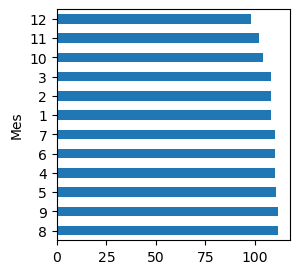

In [60]:
df['Mes'].value_counts(dropna=False).plot(kind='barh', xlabel="Mes", figsize=(3,3))

<AxesSubplot:ylabel='Nom mes'>

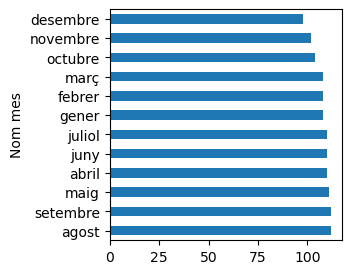

In [78]:
df['Nom mes'].value_counts(dropna=False).plot(kind='barh', xlabel="Nom mes", figsize=(3,3))

<AxesSubplot:ylabel='Any'>

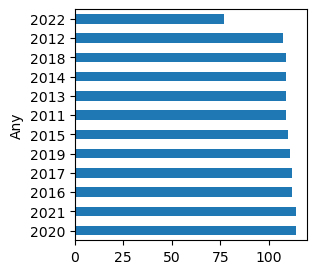

In [79]:
df['Any'].value_counts(dropna=False).plot(kind='barh', xlabel="Any", figsize=(3,3))

<AxesSubplot:ylabel='Motiu de la denúncia'>

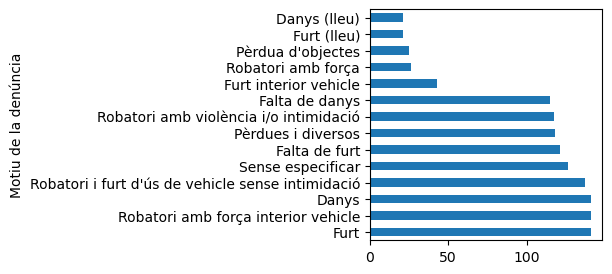

In [80]:
df['Motiu de la denúncia'].value_counts(dropna=False).plot(kind='barh', xlabel="Motiu de la denúncia", figsize=(3,3))

Veiem que les denúncies online solen estar relacionades amb robatoris i danys. Encara que pel que haviem vist anteriorment, en general la majoria de denúncies són per fets similars.
En tot cas, com és imaginable, molts delictes (sobretot els greus) no es fan online. Evidentment, si som víctimes d'un delicte greu anirem directament a comisaria a posar una denúncia enlloc de fer-la online.

<AxesSubplot:ylabel='Àmbit territorial'>

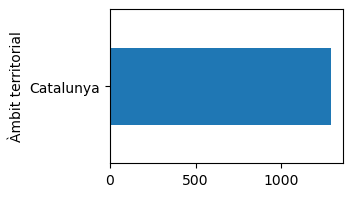

In [81]:
df['Àmbit territorial'].value_counts(dropna=False).plot(kind='barh', xlabel="Àmbit territorial", figsize=(3,2))

In [61]:
#Crearem una nova columna que indica el percentattge de denúncies ratificades sobre el total
df['Perc. Ratificades'] = df['Ratificades'] / df['Total'] * 100

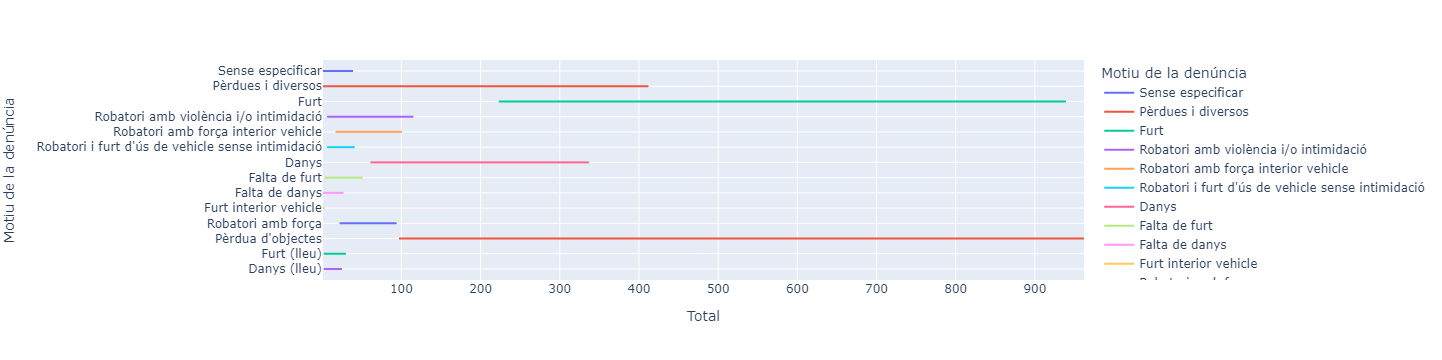

In [62]:
#Veiem que alguns tipus de denúncies són molt minoritàries
px.line(df, y="Motiu de la denúncia", x="Total", color="Motiu de la denúncia")

In [63]:
mida = df['Total']/50+1
fig_ratificades = px.scatter(df, x="Motiu de la denúncia", y="Perc. Ratificades", color="Motiu de la denúncia",size=mida, animation_frame="Any", animation_group="Motiu de la denúncia", range_y=[0,100])

In [103]:
app = dash.Dash()
server = app.server
app.layout = html.Div(children=[
    html.H1(children='Delinqüència a Catalunya'),
    
    html.Br(),
    html.Div(children='''
        Quina és l'evolució de la delinqüència en els últims anys?
    '''),
    dcc.Graph(
        id='evolucio-delinquencia',
        figure=fig_evolucio
    ),
    
    html.Br(),
    html.Div(children='''
        Quins tipus de delicte estàn incrementant/disminuint (dels 5 delictes més comuns)?
    '''),
    dcc.Graph(
        id='evolucio-incr',
        figure=fig_delIncr
    ),
    
    html.Br(),
    html.Div(children='''
        En quines zones de Catalunya hi ha més delinqüència?
    '''),
    dcc.Graph(
        id='quines-zones',
        figure=fig_zonesDel
    ),
    
    html.Br(),
    html.Div(children='''
        Hi ha èpoques de l'any en les que hi ha més o menys delinqüència? Varien els tipus de delictes comesos segons l'època de l'any? En quins tipus de delicte s'ha aconseguit detenir a l'autor o resoldre el cas en major percentatge de casos i en quin menys?
    '''),
    dcc.Dropdown(df_fetsConeguts['Títol Codi Penal'].unique(), 'De l’homicidi i les seves formes', id='epoques-any-dropdown'),
    dcc.Graph(
        id='epoques-any',
        figure=fig_perMesos
    ),
    
    html.Br(),
    html.Div(children='''
        Quina importància té l'edat envers la probabilitat de ser autor o víctima d'un delicte d'odi o discriminació?
    '''),
    dcc.Dropdown(df_victimesDiscriminacio['Àmbit fet'].unique(), 'Sexisme', id='victimes-edat-dropdown'),
    dcc.Graph(
        id='victimes-edat',
        figure=fig_edatDiscriminacio
    ),
    
    html.Br(),
    html.Div(children='''
        En el cas de les denúncies online quin tipus de delicte és més probable que sigui o no sigui ratificat?
    '''),
    dcc.Graph(
        id='ratificades',
        figure=fig_ratificades
    ),
])



@app.callback(
    Output(component_id='epoques-any', component_property='figure'),  
    [Input(component_id='epoques-any-dropdown', component_property='value')]
)
def update_output1(value):
    df2 = df_fetsConeguts[df_fetsConeguts['Títol Codi Penal'] == value]
    t = df2.groupby(["Mes"]).sum()
    t = {'Mes':llistaMesos,'Coneguts':t['Coneguts'], 'Resolts':t['Resolts'], 'Detencions':t['Detencions']}
    return px.line(t, x='Mes', y=['Coneguts', 'Resolts', 'Detencions'])

    

@app.callback(
    Output(component_id='victimes-edat', component_property='figure'),
    [Input(component_id='victimes-edat-dropdown', component_property='value')]
)
def update_output2(value):
    llistaEdats = []
    t = df_victimesDiscriminacio[(df_victimesDiscriminacio['Rol'] == 'Víctimes') & (df_victimesDiscriminacio['Àmbit fet'] == value)]
    val = t['Edat']/t.count()[0]
    llistaEdats.append(val)

    t = df_victimesDiscriminacio[(df_victimesDiscriminacio['Rol'] == 'Víctima') & (df_victimesDiscriminacio['Àmbit fet'] == value)]
    val = t['Edat']/t.count()[0]
    llistaEdats.append(val)

    t = df_victimesDiscriminacio[(df_victimesDiscriminacio['Rol'] == 'Persones autores') & (df_victimesDiscriminacio['Àmbit fet'] == value)]
    val = t['Edat']/t.count()[0]
    llistaEdats.append(val)

    t = df_victimesDiscriminacio[(df_victimesDiscriminacio['Rol'] == 'Persona autora') & (df_victimesDiscriminacio['Àmbit fet'] == value)]
    val = t['Edat']/t.count()[0]
    llistaEdats.append(val)

    llistaEdats = list(itertools.chain.from_iterable(llistaEdats))
    t = df_victimesDiscriminacio[(df_victimesDiscriminacio['Àmbit fet'] == value)]
    t = t.sort_values(["Rol"],ascending=False)
    t['EdatMitja'] = llistaEdats
    f = px.pie(t, values='EdatMitja', names='Rol', title='Edat mitja dels autors i les víctimes')
    return f 
    
    

In [104]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [106]:
ddf = pd.read_csv('https://analisi.transparenciacatalunya.cat/api/views/tuxj-za9s/rows.csv?accessType=DOWNLOAD&sorting=true')
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mes                   1306 non-null   int64  
 1   Nom mes               1306 non-null   object 
 2   Any                   1306 non-null   int64  
 3   Motiu de la denúncia  1306 non-null   object 
 4   Àmbit territorial     1306 non-null   object 
 5   No ratificades        874 non-null    float64
 6   Ratificades           1293 non-null   float64
 7   Total                 1306 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 81.8+ KB


In [107]:
ddf

,Mes,Nom mes,Any,Motiu de la denúncia,Àmbit territorial,No ratificades,Ratificades,Total
0,1,gener,2011,Sense especificar,Catalunya,NaN,2.0,2
1,1,gener,2011,Pèrdues i diversos,Catalunya,130.0,38.0,168
2,1,gener,2011,Furt,Catalunya,314.0,89.0,403
3,1,gener,2011,Robatori amb violència i/o intimidació,Catalunya,49.0,8.0,57
4,1,gener,2011,Robatori amb força interior vehicle,Catalunya,46.0,21.0,67
...,...,...,...,...,...,...,...,...
1301,9,setembre,2022,Robatori amb força,Catalunya,52.0,8.0,60
1302,9,setembre,2022,Robatori amb força interior vehicle,Catalunya,65.0,18.0,83
1303,9,setembre,2022,Robatori i furt d'ús de vehicle sense intimidació,Catalunya,33.0,7.0,40
1304,9,setembre,2022,Danys,Catalunya,204.0,42.0,246
